<a href="https://colab.research.google.com/github/datasonic-jp/sportsorcier/blob/main/copy_github_S'port_Sorcier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from datetime import timedelta
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Le Wagon/all_join_football.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320105 entries, 0 to 320104
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_match              320105 non-null  object 
 1   id_bookmaker          320105 non-null  int64  
 2   bookmaker_name        320105 non-null  object 
 3   country               320105 non-null  object 
 4   championship          320105 non-null  object 
 5   season                320105 non-null  object 
 6   match_date            320105 non-null  object 
 7   match_hour            320105 non-null  object 
 8   home                  320105 non-null  object 
 9   away                  320105 non-null  object 
 10  first_result_h        320105 non-null  int64  
 11  first_result_a        320105 non-null  int64  
 12  second_result_h       320105 non-null  int64  
 13  second_result_a       320105 non-null  int64  
 14  result_h              320105 non-null  int64  
 15  

In [ ]:
df['result_numeric'], _ = pd.factorize(df['result'])
df['prob_h'] = 1 / df['odds_h_close']
df['prob_d'] = 1 / df['odds_d_close']
df['prob_a'] = 1 / df['odds_a_close']
df['marge_bookmaker'] = (df['prob_h'] + df['prob_d'] + df['prob_a']) - 1
df['bookmaker_name_numeric'], _ = pd.factorize(df['bookmaker_name'])
df['country_numeric'], _ = pd.factorize(df['country'])
df['championship_numeric'], _ = pd.factorize(df['championship'])
df['season_numeric'], _ = pd.factorize(df['season'])
df['match_hour_numeric'], _ = pd.factorize(df['match_hour'])
df['home_numeric'], _ = pd.factorize(df['home'])
df['away_numeric'], _ = pd.factorize(df['away'])
df['match_date'] = pd.to_datetime(df['match_date'])
df['match_month'] = df['match_date'].dt.month
df['match_quarter'] = df['match_date'].dt.quarter
df['match_hour'] = pd.to_datetime(df['match_hour'], format='%H:%M:%S')
df['match_hour_only'] = df['match_hour'].dt.hour
df['match_day_of_week'] = df['match_date'].dt.day_name()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320105 entries, 0 to 320104
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_match                320105 non-null  object        
 1   id_bookmaker            320105 non-null  int64         
 2   bookmaker_name          320105 non-null  object        
 3   country                 320105 non-null  object        
 4   championship            320105 non-null  object        
 5   season                  320105 non-null  object        
 6   match_date              320105 non-null  datetime64[ns]
 7   match_hour              320105 non-null  datetime64[ns]
 8   home                    320105 non-null  object        
 9   away                    320105 non-null  object        
 10  first_result_h          320105 non-null  int64         
 11  first_result_a          320105 non-null  int64         
 12  second_result_h         320105

# Matrix of correlation de base


In [ ]:
df_matrixOfCorrelationBase = df[['first_result_h', 'first_result_a', 'second_result_h',
                             'second_result_a', 'result_h', 'result_a', 'odds_h_open',
                             'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close',
                             'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var',
                             'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a',
                              'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric',
                              'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric']]

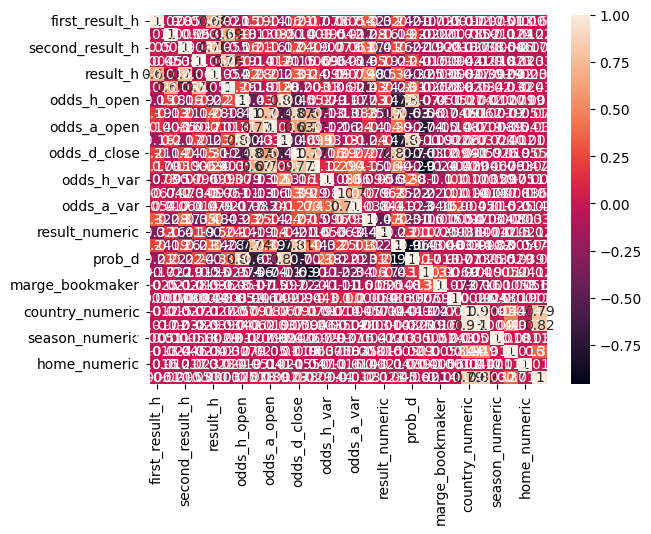

In [ ]:
correlation_matrix = df_matrixOfCorrelationBase.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
#correlation_matrix

# Régression Linéaire : Bof




In [ ]:
df[['first_result_h', 'first_result_a', 'second_result_h',
                             'second_result_a', 'result_h', 'result_a', 'odds_h_open',
                             'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close',
                             'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var',
                             'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a',
                              'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric',
                              'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric']]

,first_result_h,first_result_a,second_result_h,second_result_a,result_h,result_a,odds_h_open,odds_d_open,odds_a_open,odds_h_close,...,prob_d,prob_a,marge_bookmaker,bookmaker_name_numeric,country_numeric,championship_numeric,season_numeric,match_hour_numeric,home_numeric,away_numeric
0,0,1,3,0,3,1,1.60,5.75,4.15,1.43,...,0.142857,0.202020,0.044178,0,0,0,0,0,0,0
1,0,1,3,0,3,1,1.66,5.40,4.20,1.43,...,0.136986,0.192308,0.028595,1,0,0,0,0,0,0
2,0,1,3,0,3,1,1.58,4.30,3.90,1.42,...,0.147059,0.192308,0.043592,2,0,0,0,0,0,0
3,0,1,3,0,3,1,1.71,5.45,4.02,1.42,...,0.136799,0.190114,0.031138,3,0,0,0,0,0,0
4,0,1,3,0,3,1,1.65,4.90,4.10,1.42,...,0.142857,0.208333,0.055416,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320100,0,0,1,3,1,3,2.60,2.68,3.63,3.18,...,0.440529,0.273973,0.028967,15,0,1,5,2,205,153
320101,0,0,1,3,1,3,2.63,2.50,3.06,3.06,...,0.448430,0.311526,0.086754,16,0,1,5,2,205,153
320102,0,0,1,3,1,3,2.63,2.55,3.50,2.90,...,0.429185,0.289855,0.063867,17,0,1,5,2,205,153
320103,0,0,1,3,1,3,2.60,2.50,3.50,2.88,...,0.416667,0.303030,0.066919,18,0,1,5,2,205,153


In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_lin_reg_num = df[['odds_h_open','odds_d_open', 'odds_a_open','odds_h_var', 'odds_d_var', 'odds_a_var' ]]
y_lin_reg = df['result_h']

# Sélection des caractéristiques catégorielles
X_lin_reg_cat = df[['home', 'away']]

# Vérification de la présence de caractéristiques
has_num_features = not X_lin_reg_num.empty
has_cat_features = not X_lin_reg_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_lin_reg_num_train, X_lin_reg_num_test, y_lin_reg_train, y_lin_reg_test = train_test_split(X_lin_reg_num, y_lin_reg, test_size=0.2, random_state=42)
if has_cat_features:
    X_lin_reg_cat_train, X_lin_reg_cat_test = train_test_split(X_lin_reg_cat, test_size=0.2, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_lin_reg_num_train_scaled = scaler.fit_transform(X_lin_reg_num_train) if has_num_features else np.array([])
X_lin_reg_num_test_scaled = scaler.transform(X_lin_reg_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_lin_reg_cat_train_encoded = encoder.fit_transform(X_lin_reg_cat_train) if has_cat_features else np.array([])
X_lin_reg_cat_test_encoded = encoder.transform(X_lin_reg_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_lin_reg_train_combined = np.hstack((X_lin_reg_num_train_scaled, X_lin_reg_cat_train_encoded))
    X_lin_reg_test_combined = np.hstack((X_lin_reg_num_test_scaled, X_lin_reg_cat_test_encoded))
elif has_num_features:
    X_lin_reg_train_combined = X_lin_reg_num_train_scaled
    X_lin_reg_test_combined = X_lin_reg_num_test_scaled
elif has_cat_features:
    X_lin_reg_train_combined = X_lin_reg_cat_train_encoded
    X_lin_reg_test_combined = X_lin_reg_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_lin_reg_train_combined, y_lin_reg_train)

# Prédiction et évaluation
y_lin_reg_pred = model.predict(X_lin_reg_test_combined)

# Calcul du MSE
mse = mean_squared_error(y_lin_reg_test, y_lin_reg_pred)

# Calcul du score R²
score = model.score(X_lin_reg_test_combined, y_lin_reg_test)

print(f"Mean Squared Error: {mse}")
print(f"Score (R²): {score}")
print(f"Predictions: {y_lin_reg_pred}")

Mean Squared Error: 1.3378706570412575
Score (R²): 0.15408348464690869
Predictions: [1.91173503 1.40850042 1.30391532 ... 1.77092589 0.73531928 1.05507601]


# Catégorisation 5 : 90,1 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var',  'odds_h_open', 'odds_d_open', 'odds_a_open']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name','championship','country']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(X_class_num, y_class_encoded, test_size=0.2, random_state=42)
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(X_class_cat, test_size=0.2, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9017978475812624
Predictions: ['d' 'd' 'h' ... 'h' 'a' 'h']
Precision: 0.9036253434836405
Recall: 0.9017978475812624


# Catégorisation 6 : 91,62 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name','championship','country']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(X_class_num, y_class_encoded, test_size=0.2, random_state=42)
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(X_class_cat, test_size=0.2, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9162149919557645
Predictions: ['d' 'd' 'h' ... 'h' 'a' 'h']
Precision: 0.9173250883958672
Recall: 0.9162149919557645


In [ ]:


iris = datasets.load_iris()
X, y = iris.data[:, :], iris.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Catégorisation 7 : 91,64 %



df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name','championship']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(X_class_num, y_class_encoded, test_size=0.2, random_state=42)
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(X_class_cat, test_size=0.2, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9164180503272363
Predictions: ['d' 'd' 'h' ... 'h' 'a' 'h']
Precision: 0.9176002205444875
Recall: 0.9164180503272363


df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name', 'championship','season']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(
        X_class_num, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
    )
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(
        X_class_cat, test_size=0.2, random_state=42, stratify=y_class_encoded
    )

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)

# Rapport de classification
classification_rep = classification_report(y_class_test, y_class_pred, target_names=label_encoder_y.classes_)

# Matrice de confusion
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9594351853298136
Precision: 0.9598994705029246
Recall: 0.9594351853298136
Classification Report:
              precision    recall  f1-score   support

           a       0.96      0.96      0.96     19493
           d       0.98      0.93      0.95     17165
           h       0.95      0.98      0.96     27363

    accuracy                           0.96     64021
   macro avg       0.96      0.96      0.96     64021
weighted avg       0.96      0.96      0.96     64021

Confusion Matrix:
[[18650   163   680]
 [  390 15956   819]
 [  378   167 26818]]


**Ca fonctionne meme si la saison n'est 2024/2025 n'est pas dans les trains/test ?**

# Catégorisation 8 : 93,2 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'marge_bookmaker']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name', 'championship','country','match_hour']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(
        X_class_num, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
    )
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(
        X_class_cat, test_size=0.2, random_state=42, stratify=y_class_encoded
    )

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)

# Rapport de classification
classification_rep = classification_report(y_class_test, y_class_pred, target_names=label_encoder_y.classes_)

# Matrice de confusion
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9329751175395573
Precision: 0.9341851839943097
Recall: 0.9329751175395573
Classification Report:
              precision    recall  f1-score   support

           a       0.94      0.93      0.93     19493
           d       0.96      0.88      0.92     17165
           h       0.91      0.97      0.94     27363

    accuracy                           0.93     64021
   macro avg       0.94      0.93      0.93     64021
weighted avg       0.93      0.93      0.93     64021

Confusion Matrix:
[[18103   270  1120]
 [  645 15149  1371]
 [  603   282 26478]]


# Catégorisation 9 : 95,30 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var', 'marge_bookmaker']]
y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name', 'championship','country','match_hour']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(
        X_class_num, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
    )
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(
        X_class_cat, test_size=0.2, random_state=42, stratify=y_class_encoded
    )

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)

# Rapport de classification
classification_rep = classification_report(y_class_test, y_class_pred, target_names=label_encoder_y.classes_)

# Matrice de confusion
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9530154168163572
Precision: 0.9535896203042393
Recall: 0.9530154168163572
Classification Report:
              precision    recall  f1-score   support

           a       0.95      0.95      0.95     19493
           d       0.98      0.92      0.95     17165
           h       0.94      0.98      0.96     27363

    accuracy                           0.95     64021
   macro avg       0.96      0.95      0.95     64021
weighted avg       0.95      0.95      0.95     64021

Confusion Matrix:
[[18508   212   773]
 [  455 15766   944]
 [  434   190 26739]]


# Catégorisation 10 : 96,89 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result' 'match_month' 'match_date' 'match_quarter']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var', 'marge_bookmaker']]

y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name', 'championship','country','match_hour', 'match_quarter']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(
        X_class_num, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
    )
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(
        X_class_cat, test_size=0.2, random_state=42, stratify=y_class_encoded
    )

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)

# Rapport de classification
classification_rep = classification_report(y_class_test, y_class_pred, target_names=label_encoder_y.classes_)

# Matrice de confusion
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9689164492900767
Precision: 0.9692171599225499
Recall: 0.9689164492900767
Classification Report:
              precision    recall  f1-score   support

           a       0.97      0.97      0.97     19493
           d       0.98      0.94      0.96     17165
           h       0.96      0.99      0.97     27363

    accuracy                           0.97     64021
   macro avg       0.97      0.97      0.97     64021
weighted avg       0.97      0.97      0.97     64021

Confusion Matrix:
[[18854   126   513]
 [  269 16220   676]
 [  266   140 26957]]


# Catégorisation 11 : 98,35 %

df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result' 'match_month' 'match_date' 'match_quarter']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'prob_d', 'prob_a','odds_h_var', 'odds_d_var', 'odds_a_var', 'marge_bookmaker']]

y_class = df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = df[['home', 'away', 'bookmaker_name', 'championship','country','match_quarter','match_month','match_hour_only','match_day_of_week']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(
        X_class_num, y_class_encoded, test_size=0.1, random_state=42, stratify=y_class_encoded
    )
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(
        X_class_cat, test_size=0.1, random_state=42, stratify=y_class_encoded
    )

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)

# Rapport de classification
classification_rep = classification_report(y_class_test, y_class_pred, target_names=label_encoder_y.classes_)

# Matrice de confusion
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9835993877104745
Precision: 0.9836953747699492
Recall: 0.9835993877104745
Classification Report:
              precision    recall  f1-score   support

           a       0.98      0.98      0.98      9747
           d       0.99      0.97      0.98      8583
           h       0.98      0.99      0.98     13681

    accuracy                           0.98     32011
   macro avg       0.98      0.98      0.98     32011
weighted avg       0.98      0.98      0.98     32011

Confusion Matrix:
[[ 9587    21   139]
 [   80  8329   174]
 [   73    38 13570]]


# Catégorisation 4 : 99,69 %


**Découpage du dataset d'entrainement sans les 3 derieres semaines de résultats**

In [ ]:
# Trouver la date la plus récente dans le DataFrame
max_date = df['match_date'].max()

# Calculer la date de début des trois dernières semaines
cutoff_date = max_date - timedelta(weeks=3)

# Diviser le DataFrame
# Données pour l'entraînement (avant les trois dernières semaines)
train_df = df[df['match_date'] < cutoff_date]

# Données pour la prédiction (les trois dernières semaines)
predict_df = df[df['match_date'] >= cutoff_date]

# Afficher les tailles des DataFrames pour vérifier
print(f"Taille du DataFrame d'entraînement: {train_df.shape[0]} lignes")
print(f"Taille du DataFrame de prédiction: {predict_df.shape[0]} lignes")

Taille du DataFrame d'entraînement: 317842 lignes
Taille du DataFrame de prédiction: 2263 lignes


df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
# Sélection des caractéristiques numériques et de la cible
X_class_num = train_df[['prob_h', 'prob_d', 'prob_a', 'marge_bookmaker']]

y_class = train_df['result']

# Sélection des caractéristiques catégorielles
X_class_cat = train_df[['home', 'away', 'bookmaker_name', 'championship','country','match_quarter','match_month','match_hour_only','match_day_of_week']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(X_class_num, y_class_encoded, test_size=0.3, random_state=42)
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(X_class_cat, test_size=0.3, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9969272073243631
Predictions: ['h' 'd' 'd' ... 'h' 'a' 'h']
Precision: 0.9969294311395903
Recall: 0.9969272073243631


# Test match 3 dernieres semaine de dataframe

In [ ]:
predict_df.info()

NameError: name 'predict_df' is not defined

In [ ]:
# Sélectionner les caractéristiques numériques
new_data_num = predict_df[['prob_h', 'prob_d', 'prob_a', 'marge_bookmaker']]

# Sélectionner les caractéristiques catégorielles
new_data_cat = predict_df[['home', 'away', 'bookmaker_name', 'championship', 'country', 'match_quarter', 'match_month', 'match_hour_only', 'match_day_of_week']]

# Appliquer les mêmes transformations
new_data_num_scaled = scaler.transform(new_data_num) if has_num_features else np.array([])
new_data_cat_encoded = encoder.transform(new_data_cat) if has_cat_features else np.array([])

# Combinaison des nouvelles données
if has_num_features and has_cat_features:
    new_data_combined = np.hstack((new_data_num_scaled, new_data_cat_encoded))
elif has_num_features:
    new_data_combined = new_data_num_scaled
elif has_cat_features:
    new_data_combined = new_data_cat_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Prédiction sur les nouvelles données
new_predictions = model.predict(new_data_combined)
new_predictions_decoded = label_encoder_y.inverse_transform(new_predictions)

#print(f"New Predictions: {new_predictions_decoded}")

# Créer un DataFrame résultant
result_df = pd.DataFrame(new_data_cat)  # Commence avec les données catégorielles
result_df = pd.concat([result_df, new_data_num], axis=1)  # Ajoute les données numériques
result_df['prediction'] = new_predictions_decoded  # Ajoute les prédictions

result_df.head()

,home,away,bookmaker_name,championship,country,match_quarter,match_month,match_hour_only,match_day_of_week,prob_h,prob_d,prob_a,marge_bookmaker,prediction
5140,ac_milan,salernitana,10x10bet,serie-a,italy,2,5,20,Saturday,0.884956,0.052632,0.090909,0.028496,h
5141,ac_milan,salernitana,1xbet,serie-a,italy,2,5,20,Saturday,0.877193,0.058824,0.095238,0.031255,h
5142,ac_milan,salernitana,888sport,serie-a,italy,2,5,20,Saturday,0.900901,0.052632,0.100000,0.053532,h
5143,ac_milan,salernitana,alphabet,serie-a,italy,2,5,20,Saturday,0.884956,0.052632,0.090909,0.028496,h
5144,ac_milan,salernitana,bet-at-home,serie-a,italy,2,5,20,Saturday,0.900901,0.058824,0.100000,0.059724,h


In [ ]:
# Ajouter la colonne 'result' de predict_df à result_df
result_df['result'] = predict_df['result']

In [ ]:
result_df['mise'] = 10

In [ ]:
result_df['testMiseH'] = 'h'

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 5140 to 316310
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home               2263 non-null   object 
 1   away               2263 non-null   object 
 2   bookmaker_name     2263 non-null   object 
 3   championship       2263 non-null   object 
 4   country            2263 non-null   object 
 5   match_quarter      2263 non-null   int32  
 6   match_month        2263 non-null   int32  
 7   match_hour_only    2263 non-null   int32  
 8   match_day_of_week  2263 non-null   object 
 9   prob_h             2263 non-null   float64
 10  prob_d             2263 non-null   float64
 11  prob_a             2263 non-null   float64
 12  marge_bookmaker    2263 non-null   float64
 13  prediction         2263 non-null   object 
 14  result             2263 non-null   object 
 15  mise               2263 non-null   int64  
 16  testMiseH          2263 

In [ ]:
# Définir une fonction pour calculer le gain
def calculate_gain(row):
    if row['result'] != row['testMiseH']: #row['prediction']:
        return 0
    elif row['result'] == 'h':
        return row['mise'] * (1 / row['prob_h'])
    # elif row['result'] == 'd':
    #     return row['mise'] * (1 / row['prob_d'])
    # elif row['result'] == 'a':
    #     return row['mise'] * (1 / row['prob_a'])
    else:
        return 0

# Appliquer la fonction à chaque ligne du DataFrame
result_df['gain'] = result_df.apply(calculate_gain, axis=1)

In [ ]:
# Afficher les premières lignes pour vérifier
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 5140 to 316310
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home               2263 non-null   object 
 1   away               2263 non-null   object 
 2   bookmaker_name     2263 non-null   object 
 3   championship       2263 non-null   object 
 4   country            2263 non-null   object 
 5   match_quarter      2263 non-null   int32  
 6   match_month        2263 non-null   int32  
 7   match_hour_only    2263 non-null   int32  
 8   match_day_of_week  2263 non-null   object 
 9   prob_h             2263 non-null   float64
 10  prob_d             2263 non-null   float64
 11  prob_a             2263 non-null   float64
 12  marge_bookmaker    2263 non-null   float64
 13  prediction         2263 non-null   object 
 14  result             2263 non-null   object 
 15  mise               2263 non-null   int64  
 16  testMiseH          2263 

In [ ]:
# Calculer la somme de la colonne 'gain'
total_gain = result_df['gain'].sum()

# Afficher le résultat
print(f"La somme totale des gains est : {total_gain}")

La somme totale des gains est : 18353.3


# Test vrais matchs avec nouvel entrainement

In [ ]:
# Chemin vers les fichiers CSV
file_pattern = '/content/drive/MyDrive/Le Wagon/*X_class_cat*.csv'

# Liste des fichiers correspondant au motif
csv_files = glob.glob(file_pattern)

# Liste pour stocker les DataFrames
dataframes = []

# Lire chaque fichier CSV
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concaténer tous les DataFrames
combined_df_X_class_cat = pd.concat(dataframes, ignore_index=False)

combined_df_X_class_cat

,id_match,home,away,championship,country,match_quarter,match_month,match_hour_only,match_day_of_week
0,2025-3-29_rea_val,real sociedad,valladolid,laliga,spain,1,3,14,saturday
1,2025-3-15_mal_esp,mallorca,espanyol,laliga,spain,1,3,16,saturday
2,2025-3-16_leg_bet,leganes,betis,laliga,spain,1,3,14,sunday
3,2025-3-15_val_cel,valladolid,celta vigo,laliga,spain,1,3,14,saturday
4,2025-3-29_esp_atl,espanyol,atl. madrid,laliga,spain,1,3,16,saturday
...,...,...,...,...,...,...,...,...,...
2,2025-3-15_ips_not,ipswich,nottingham,premier-league,england,1,3,16,saturday
3,2025-3-15_bou_bre,bournemouth,brentford,premier-league,england,1,3,18,saturday
4,2025-3-16_ful_tot,fulham,tottenham,premier-league,england,1,3,14,sunday
5,2025-3-15_sou_wol,southampton,wolves,premier-league,england,1,3,16,saturday


In [ ]:
# Chemin vers les fichiers CSV
file_pattern = '/content/drive/MyDrive/Le Wagon/*X_class_num*.csv'

# Liste des fichiers correspondant au motif
csv_files = glob.glob(file_pattern)

# Liste pour stocker les DataFrames
dataframes = []

# Lire chaque fichier CSV
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concaténer tous les DataFrames
combined_df_X_class_num = pd.concat(dataframes, ignore_index=False)

combined_df_X_class_num

,id_match,prob_h,prob_d,prob_a,marge_bookmaker,bookmaker_name
0,2025-3-16_pis_man,0.645161,0.259740,0.166667,0.071568,10bet
1,2025-3-16_pis_man,0.641026,0.257732,0.161290,0.060048,10x10bet
2,2025-3-16_pis_man,0.636943,0.259740,0.155039,0.051722,1xbet
3,2025-3-16_pis_man,0.657895,0.271739,0.169492,0.099125,alphabet
4,2025-3-16_pis_man,0.649351,0.259740,0.161290,0.070381,bc.game
...,...,...,...,...,...,...
223,2025-3-16_atl_bar,0.316456,0.268817,0.448430,0.033703,pinnacle
224,2025-3-16_atl_bar,0.333333,0.273973,0.434783,0.042089,superbet.ro
225,2025-3-16_atl_bar,0.317460,0.277778,0.467290,0.062528,unibet
226,2025-3-16_atl_bar,0.333333,0.277778,0.444444,0.055556,william hill


In [ ]:
df_X_class_cat = combined_df_X_class_cat
df_X_class_num = combined_df_X_class_num

# Recup result vrais match

In [ ]:
# Chemin vers les fichiers CSV
file_pattern = '/content/drive/MyDrive/Le Wagon/*predictions*.csv'

# Liste des fichiers correspondant au motif
csv_files = glob.glob(file_pattern)

# Liste pour stocker les DataFrames
dataframes = []

# Lire chaque fichier CSV
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concaténer tous les DataFrames
combined_df_pred = pd.concat(dataframes, ignore_index=False)

In [ ]:
combined_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 139
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home               1010 non-null   object 
 1   away               1010 non-null   object 
 2   bookmaker_name     1010 non-null   object 
 3   championship       1010 non-null   object 
 4   country            1010 non-null   object 
 5   match_quarter      1010 non-null   int64  
 6   match_month        1010 non-null   int64  
 7   match_hour_only    1010 non-null   int64  
 8   match_day_of_week  1010 non-null   object 
 9   prob_h             1010 non-null   float64
 10  prob_d             1010 non-null   float64
 11  prob_a             1010 non-null   float64
 12  marge_bookmaker    1010 non-null   float64
 13  prediction         1010 non-null   object 
 14  result             900 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 126.2+ KB


# Test match

In [ ]:
df_X_class_cat = pd.read_csv('/content/drive/MyDrive/Le Wagon/X_class_cat.csv')
df_X_class_num = pd.read_csv('/content/drive/MyDrive/Le Wagon/X_class_num.csv')

In [ ]:
df_X_class_cat['match_quarter'] = df_X_class_cat['match_quarter'].astype(str)
df_X_class_cat['match_month'] = df_X_class_cat['match_month'].astype(str)
df_X_class_cat['match_hour_only'] = df_X_class_cat['match_hour_only'].astype(str)
merged_df = pd.merge(df_X_class_cat, df_X_class_num, on='id_match', how='inner')

# Nouvelles données pour les prédictions
new_data_num = merged_df[[
    'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker'
]]

new_data_cat = merged_df[[
    'home', 'away', 'bookmaker_name','championship', 'country','match_quarter', 'match_month', 'match_hour_only','match_day_of_week'
]]

# Appliquer les mêmes transformations
new_data_num_scaled = scaler.transform(new_data_num) if has_num_features else np.array([])
new_data_cat_encoded = encoder.transform(new_data_cat) if has_cat_features else np.array([])

# Combinaison des nouvelles données
if has_num_features and has_cat_features:
    new_data_combined = np.hstack((new_data_num_scaled, new_data_cat_encoded))
elif has_num_features:
    new_data_combined = new_data_num_scaled
elif has_cat_features:
    new_data_combined = new_data_cat_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Prédiction sur les nouvelles données
new_predictions = model.predict(new_data_combined)
new_predictions_decoded = label_encoder_y.inverse_transform(new_predictions)

#print(f"New Predictions: {new_predictions_decoded}")

# Créer un DataFrame résultant
result_df = pd.DataFrame(new_data_cat)  # Commence avec les données catégorielles
result_df = pd.concat([result_df, new_data_num], axis=1)  # Ajoute les données numériques
result_df['prediction'] = new_predictions_decoded  # Ajoute les prédictions

In [ ]:
# Chemin où enregistrer le fichier CSV
output_path = '/content/drive/MyDrive/Le Wagon/predictions.csv'

# Enregistrer le DataFrame en fichier CSV
result_df.to_csv(output_path, index=False)

# Resultat € Vrais matchs

In [ ]:
df_result_mise = pd.read_csv('/content/drive/MyDrive/Le Wagon/predictionsall.csv')

In [ ]:
df_filtered = df_result_mise.dropna(subset=['result'])

In [ ]:
df_result_mise.info()

df_result_mise['mise'] = 10

# Définir une fonction pour calculer le gain
def calculate_gain(row):
    if row['result'] != row['prediction']:
        return 0
    elif row['result'] == 'h':
        return row['mise'] * (1 / row['prob_h'])
    elif row['result'] == 'd':
        return row['mise'] * (1 / row['prob_d'])
    elif row['result'] == 'a':
        return row['mise'] * (1 / row['prob_a'])
    else:
        return 0

# Appliquer la fonction à chaque ligne du DataFrame
df_result_mise['gain'] = df_result_mise.apply(calculate_gain, axis=1)

# Calculer la somme de la colonne 'gain'
total_gain = df_result_mise['gain'].sum()

# Afficher le résultat
print(f"La somme totale des gains est : {total_gain}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home               1010 non-null   object 
 1   away               1010 non-null   object 
 2   bookmaker_name     1010 non-null   object 
 3   championship       1010 non-null   object 
 4   country            1010 non-null   object 
 5   match_quarter      1010 non-null   int64  
 6   match_month        1010 non-null   int64  
 7   match_hour_only    1010 non-null   int64  
 8   match_day_of_week  1010 non-null   object 
 9   prob_h             1010 non-null   float64
 10  prob_d             1010 non-null   float64
 11  prob_a             1010 non-null   float64
 12  marge_bookmaker    1010 non-null   float64
 13  prediction         1010 non-null   object 
 14  result             900 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 118.5+ KB
La somme tota

# Clustering

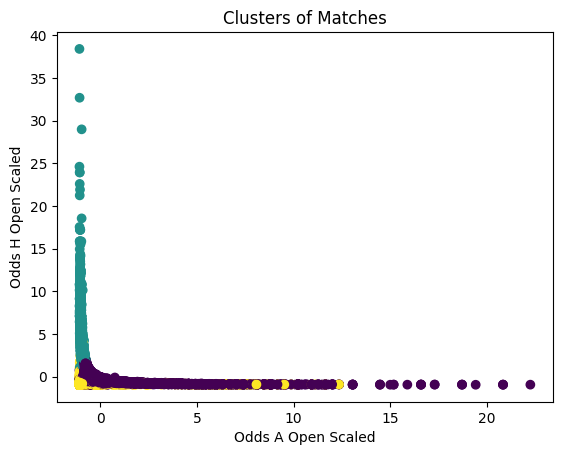

In [ ]:
# Sélection des caractéristiques numériques
X_cluster_num = df[['odds_h_open','odds_d_open', 'odds_a_open', 'odds_h_var', 'odds_d_var', 'odds_a_var']]

# Sélection des caractéristiques catégorielles
X_cluster_cat = df[['home', 'away']]

# Scaling des caractéristiques numériques
X_cluster_num_scaled = scaler.fit_transform(X_cluster_num)

# Encodage des caractéristiques catégorielles
X_cluster_cat_encoded = encoder.fit_transform(X_cluster_cat)

# Combinaison des caractéristiques numériques et catégorielles
X_cluster_combined = np.hstack((X_cluster_num_scaled, X_cluster_cat_encoded))

# Création et entraînement du modèle KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_combined)

# Visualisation des clusters
plt.scatter(X_cluster_num_scaled[:, 0], X_cluster_num_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('Odds A Open Scaled')
plt.ylabel('Odds H Open Scaled')
plt.title('Clusters of Matches')
plt.show()

In [ ]:
df[['cluster','result']].value_counts()

cluster  result
0        h         117011
         a          91480
         d          80411
1        h          15401
2        h           4401
         a           4216
1        d           2955
2        d           2459
1        a           1771
Name: count, dtype: int64

# Model 1 et 2 => 3


df[['first_result_h', 'first_result_a', 'second_result_h', 'second_result_a', 'result_h', 'result_a', 'odds_h_open', 'odds_d_open', 'odds_a_open', 'odds_h_close', 'odds_d_close', 'odds_a_close', 'odds_h_var', 'odds_d_var', 'odds_a_var', 'prono_bookmaker_isok', 'result_numeric', 'prob_h', 'prob_d', 'prob_a', 'marge_bookmaker', 'bookmaker_name_numeric', 'country_numeric', 'championship_numeric', 'season_numeric', 'match_hour_numeric', 'home_numeric', 'away_numeric', 'result']]

In [ ]:
#----------------- Modele Home Team -------------------------------

# Sélection des caractéristiques numériques et de la cible
X_class_num = df[['prob_h', 'odds_h_open']]

y_class = df['result']

# Sélection des caractéristiques catégorielles

X_class_cat = df[['home', 'bookmaker_name', 'championship','country','match_quarter','match_month','match_hour_only','match_day_of_week']]

# Encodage de la variable cible
label_encoder_y = LabelEncoder()
y_class_encoded = label_encoder_y.fit_transform(y_class)

# Vérification de la présence de caractéristiques
has_num_features = not X_class_num.empty
has_cat_features = not X_class_cat.empty

# Division des données en ensembles d'entraînement et de test
if has_num_features:
    X_class_num_train, X_class_num_test, y_class_train, y_class_test = train_test_split(X_class_num, y_class_encoded, test_size=0.3, random_state=42)
if has_cat_features:
    X_class_cat_train, X_class_cat_test = train_test_split(X_class_cat, test_size=0.3, random_state=42)

# Scaling des caractéristiques numériques
scaler = StandardScaler()
X_class_num_train_scaled = scaler.fit_transform(X_class_num_train) if has_num_features else np.array([])
X_class_num_test_scaled = scaler.transform(X_class_num_test) if has_num_features else np.array([])

# Encodage des caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_class_cat_train_encoded = encoder.fit_transform(X_class_cat_train) if has_cat_features else np.array([])
X_class_cat_test_encoded = encoder.transform(X_class_cat_test) if has_cat_features else np.array([])

# Combinaison des caractéristiques numériques et catégorielles
if has_num_features and has_cat_features:
    X_class_train_combined = np.hstack((X_class_num_train_scaled, X_class_cat_train_encoded))
    X_class_test_combined = np.hstack((X_class_num_test_scaled, X_class_cat_test_encoded))
elif has_num_features:
    X_class_train_combined = X_class_num_train_scaled
    X_class_test_combined = X_class_num_test_scaled
elif has_cat_features:
    X_class_train_combined = X_class_cat_train_encoded
    X_class_test_combined = X_class_cat_test_encoded
else:
    raise ValueError("Aucune caractéristique numérique ou catégorielle n'a été trouvée.")

# Création et entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_class_train_combined, y_class_train)

# Prédiction et évaluation
y_class_pred = model.predict(X_class_test_combined)
accuracy = accuracy_score(y_class_test, y_class_pred)

# Décodage des prédictions
pred = label_encoder_y.inverse_transform(y_class_pred)
precision = precision_score(y_class_test, y_class_pred, average='weighted')
recall = recall_score(y_class_test, y_class_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Réseaux de Neurones : Pour des modèles plus complexes capables de capturer des relations non linéaires.